# Шаталин Александр
## Рабочая тетрадь 7

### 1.1 Задание

Реализовано с помощью моей библиотеки для создания линейных перцептронов Neural Networks Constructor (https://github.com/A125X/Neural-Network-Constructor)

In [31]:
#uncomment to clone library
#!git clone https://github.com/A125X/Neural-Network-Constructor.git

In [32]:
import sys
sys.path.append("Neural-Network-Constructor/Constructor")
import NeuralNetworksConstructor as nnc
from sklearn import datasets
import random
import numpy as np

In [33]:
#obtaining dataset
classes = 10
digits = datasets.load_digits()
arr_out = np.eye(classes, dtype=int)

dataset = [
    (digits.data[i][None, ...], 
        arr_out[digits.target[i]]) 
    for i in range(len(digits.target))]
random.shuffle(dataset)

dataset[:2]

[(array([[ 0.,  0.,  5., 16., 16., 10.,  0.,  0.,  0.,  2., 16., 14., 14.,
          14.,  0.,  0.,  0.,  2., 14.,  4., 14., 10.,  0.,  0.,  0.,  0.,
           0.,  8., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  6.,
           0.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  7., 11.,
           8., 16., 11.,  0.,  0.,  0.,  8., 16., 16., 10.,  1.,  0.]]),
  array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])),
 (array([[ 0.,  0.,  6., 11., 16., 13.,  5.,  0.,  0.,  2., 16., 16., 16.,
          16., 12.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  4.,  0.,  0.,  0.,
           0., 10., 15.,  5.,  0.,  0.,  0.,  0.,  9., 16.,  3.,  0.,  0.,
           0.,  0.,  0., 13., 16., 13.,  1.,  0.,  0.,  0.,  0.,  0.,  5.,
          16., 14.,  0.,  0.,  0.,  0.,  5., 14., 11.,  6.,  0.,  0.]]),
  array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))]

In [34]:
#using part of the original data to train our neural network
dataset_trainings_len = len(dataset) * 90 // 100
dataset_training = []
for i in range(dataset_trainings_len):
    dataset_training.append(dataset[i])

#and other part to test our network
test_dataset = []
for i in range(dataset_trainings_len, len(dataset)):
    test_dataset.append(dataset[i])

test_dataset[:2]

[(array([[ 0.,  0.,  0.,  3., 15., 13.,  1.,  0.,  0.,  0.,  2., 15., 16.,
          16.,  2.,  0.,  0.,  0., 13., 10.,  5., 15.,  0.,  0.,  0.,  0.,
           6.,  2., 11.,  8.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  2.,  0.,
           0.,  0.,  3.,  8., 16.,  8.,  0.,  0.,  0.,  3., 16., 16., 16.,
          16.,  8.,  0.,  0.,  1.,  4.,  4.,  5., 13.,  6.,  0.,  0.]]),
  array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])),
 (array([[ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  2.,
           0.,  3.,  1.,  0.,  0.,  8., 10.,  0.,  2., 16.,  2.,  0.,  1.,
          15.,  4.,  3.,  9., 12.,  0.,  0.,  8., 16., 16., 16., 16.,  6.,
           0.,  0.,  1.,  4.,  3.,  9., 14.,  0.,  0.,  0.,  0.,  0.,  0.,
          15.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 10.,  0.,  0.,  0.]]),
  array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]))]

In [35]:
#providing some hyperparameters to the network
layers = [64, 32, 16, 10]
alpha = 0.00003
batch_size = len(dataset_training)
trainings = len(dataset_training) //  batch_size
epochs = 200

#creating and training the model
model = nnc.NeuralNetwork(layers, 'tanh', 'classification')
model.train(
    alpha, 
    trainings, 
    epochs, 
    batch_size, 
    dataset_training, 
    test_dataset)

Neural network output (cleared): 2
Correct output (cleared): 2
Cross-entropy before clearing: 42.06316358523758

Neural network output (cleared): 4
Correct output (cleared): 4
Cross-entropy before clearing: 49.649645478986486

Neural network output (cleared): 9
Correct output (cleared): 9
Cross-entropy before clearing: 35.52570146535294



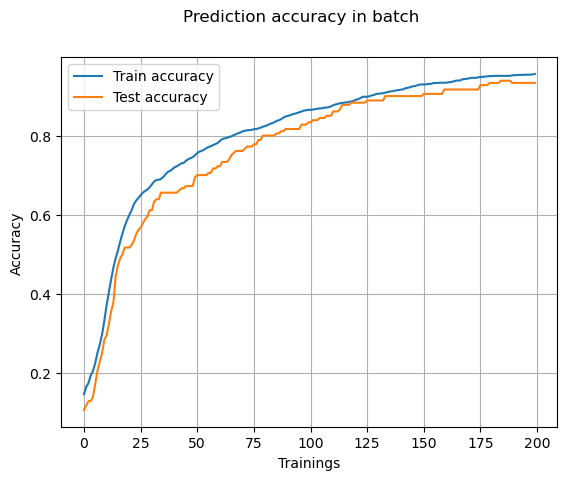

In [36]:
#testing our model using test dataset
for i in range(3):
    model.show_determined_test(dataset_i = test_dataset[i])
    print()

model.show_error()

### 1.1 Задание

In [37]:
import pandas as pd

In [38]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris_df.iloc[:, :-1].values, 
    iris_df.iloc[:, -1].values,
    train_size=0.8,
    test_size=0.2
    )

x_train[:5], y_train[:5]

(array([[6.8, 3. , 5.5, 2.1],
        [7.9, 3.8, 6.4, 2. ],
        [7.7, 3. , 6.1, 2.3],
        [5. , 3.3, 1.4, 0.2],
        [4.6, 3.6, 1. , 0.2]]),
 array(['Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa'],
       dtype=object))

In [40]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [41]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)

/Users/a125x/opt/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [42]:
y_preds = mlp_classifier.predict(x_test)

print(y_test[:5])
print(y_preds[:5])
print()
print(f'test accuracy: {mlp_classifier.score(x_test, y_test)}')
print(f'train accuracy: {mlp_classifier.score(x_train, y_train)}')

['Setosa' 'Versicolor' 'Virginica' 'Virginica' 'Versicolor']
['Setosa' 'Virginica' 'Virginica' 'Virginica' 'Versicolor']

test accuracy: 0.9666666666666667
train accuracy: 0.975


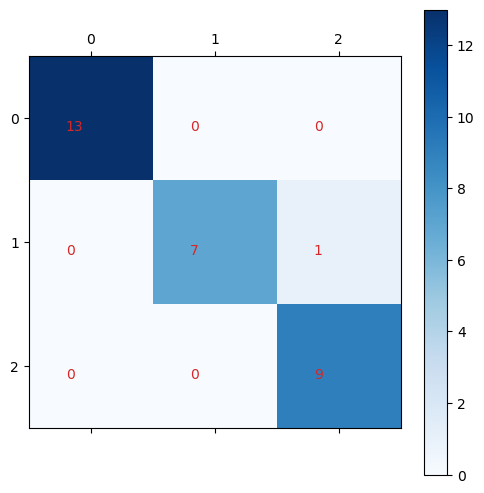

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_preds)
fig = plt.figure(figsize=(6,6))

plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
plt.yticks(range(3), range (3))
plt.xticks(range(3), range (3))
plt.colorbar ();
for i in range(3):
    for j in range(3):
        plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')


In [44]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : " , len (mlp_classifier.coefs_))
print("Number of Intercepts : ", len (mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

Loss :  0.23251954672116773
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  200
Name of Output Layer Activation Function:  softmax


In [47]:
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
x_train, x_test, y_train, y_test = train_test_split(
    salary_df.iloc[:, :-1].values, 
    salary_df.iloc[:, -1].values,
    train_size=0.8,
    test_size=0.2
    )

x_train[:5], y_train[:5]

(array([[8.7],
        [3.7],
        [5.9],
        [9. ],
        [7.9]]),
 array([109431.,  57189.,  81363., 105582., 101302.]))

In [49]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor (random_state=123)
mlp_regressor.fit(x_train, y_train)

/Users/a125x/opt/miniconda3/envs/torch/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=123)

In [52]:
y_preds = mlp_regressor.predict (x_test)
print(y_preds)
print(y_test)
## Метод Score оценивает точность моделей классификации.
print('Test R^2 Score : %.3f'%mlp_regressor.score(x_test, y_test))
print('Training R^2 Score : %.3f'%mlp_regressor.score(x_train, y_train))

[39.02785412 29.42175976 30.38241637 24.61847671 20.29341914 37.58734095]
[98273. 66029. 83088. 57081. 54445. 91738.]
Test R^2 Score : -19.764
Training R^2 Score : -6.939


In [53]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : " , len (mlp_classifier.coefs_))
print("Number of Intercepts : ", len (mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

Loss :  0.23251954672116773
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  200
Name of Output Layer Activation Function:  softmax
